## Lista 1 - Resdes complexas


## Bruner Eduardo Augusto - NUSP:9435846<br>
## William Luis Alves Ferreira - NUSP:9847599

Adicionando biblioteca "nx@networkx" para gerenciamento e produção de graficos 

In [0]:
from numpy  import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx

#definindo dimesões padrão para plot
plt.rcParams['figure.figsize'] = (11,7)

# Definindo as funções:

## Funções

In [0]:
def averagedegree(G):
  degree = nx.degree(G)
  sumde = 0
  for i in degree:
    sumde += i[1]
  ad = sumde/len(degree)  
  return ad

In [0]:
def plot_grafo(grafo):
  #print("aqui tem um grafo")
  plots = nx.spring_layout(grafo)
  nx.draw(grafo, with_labels = True, node_size=1, font_size=10, pos = plots)
  plt.show(True)

In [0]:
def degree_distribution_log(G, op):
  grau = dict(G.degree()) # dicionario (nó , grau)
  grau = list(grau.values()) # lista formada pelo grau ordenado pelo dicionario, 
  # assim correspondendo ao nó representado em um array manipulável
  grau = np.array(grau)
  maxk = np.max(grau) #maximo e  minimo do array grau
  mink = np.min(grau)
  kvalues= arange(0,maxk+1) # interalo possivel de valores
  Pk = np.zeros(maxk+1) # P(k) Vetor de zeros para armazenar a distribuição
  
  for k in grau:
      Pk[k] = Pk[k] + 1 # Contabiliza a incidencia dos graus presentes no vetor
  soma = 0
  for i in range(len(Pk)):
    soma = soma + Pk[i] # Divide todos os elementos de Pk, pela somatoria dos graus
  Pk = Pk/soma
  # caracterizando a distribuição da probabilidade de um grau,
  #plotanto a distribuição de grau
  if (op):
    # the histogram of the data
    plt.hist(grau, bins  = 10, density=True , cumulative=True)
    plt.xlabel('k', fontsize=20)
    plt.ylabel('Probabilidade', fontsize=20)
    plt.title("Hstograma de P(k)", fontsize=20)
    plt.show()

    plt.xscale('symlog')
    plt.ylabel('symlog')
    plt.plot(kvalues,Pk,'bo',)
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution k logxlog", fontsize=20)
    plt.show(True)
  return kvalues,Pk

In [0]:
def degree_distribution(G, op):
    grau = dict(G.degree()) # dicionario (nó , grau)
    grau = list(grau.values()) # lista formada pelo grau ordenado pelo dicionario, 
    # assim correspondendo ao nó representado em um array manipulável
    grau = np.array(grau)
    maxk = np.max(grau) #maximo e  minimo do array grau
    mink = np.min(grau)
    kvalues= arange(0,maxk+1) # interalo possivel de valores
    Pk = np.zeros(maxk+1) # P(k) Vetor de zeros para armazenar a distribuição
    for k in grau:
        Pk[k] = Pk[k] + 1 # Contabiliza a incidencia dos graus presentes no vetor
    soma = 0
    for i in range(len(Pk)):
      soma = soma + Pk[i] # Divide todos os elementos de Pk, pela somatoria dos graus
    Pk = Pk/soma # Divide todos os elementos de Pk, pela somatoria dos graus
    # caracterizando a distribuição da probabilidade de um grau,
    #plotanto a distribuição de grau
    if (op):
      # the histogram of the data
      plt.hist(grau, bins  = 10, density=True)
      plt.xlabel('k', fontsize=20)
      plt.ylabel('Probabilidade', fontsize=20)
      plt.title("Hstograma de P(k)", fontsize=20)
      plt.show()

      #plotanto a distribuição de grau
      plt.xlabel('k')
      plt.ylabel('Degree')
      plt.title("Dispersão Grau k")
      plt.scatter(kvalues, Pk, s=100)
    return kvalues,Pk

In [0]:
def clustering_coefficient_distribution(G):
    vcc = [] # vetor dos coeficientes de clusterização
    for i in G.nodes(): # percorrento os nós pelo iterador i
      vcc.append(nx.clustering(G, i)) # adicionando ao vetor o cluster local utilizando
      # clustering@networx parrando o grafo formado e a iteração atual
    vcc= np.array(vcc) # passa o vetor parar array do numpy
    #plotando o grafico 
    plt.figure()
    plt.hist(vcc, bins  = 10, density="normed")
    plt.title("Distribution of the clustering coefficient", fontsize=20)
    plt.ylabel("P(cc)", fontsize=15)
    plt.xlabel("Clustering coefficient (cc)", fontsize=15)
    plt.grid(True)
    plt.savefig('clustering.eps') #save the figure into a file
    plt.show()

In [0]:
def momment_of_degree_distribution2(G):
    m = 2 # como solicitado na lista focaremos no 2º momento estatistico
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [0]:
def distanceMatrix(G, N):
  if nx.is_connected(G) == True:
    d = nx.diameter(G) #iniciamente define-se o diametro
    D = zeros(shape=(N,N)) # D construindo a matriz de distancia com zeros baseado nos pares existente em G1
  
    vl = []
    for i in arange(0,N-1):
        for j in arange(i+1, N-1):
            if(i != j):
                aux = nx.shortest_path(G,source = i, target =j) # calculo da distância de um Par(i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)
    plt.hist(vl, bins = x, density="normed")
    plt.title("Distribution of the geodesic distances", fontsize=20)
    plt.ylabel("P(l)", fontsize=15)
    plt.xlabel("Shortest path length (l)", fontsize=15)
    #plt.grid(True)
    plt.savefig('av_short_path.eps')
    plt.show(True)
  else :
    print("The graph has more than one connected component")
  return D

In [0]:
def multMatrix(x, y): #  compara linha de a com coluna de b
    #if(len(x[0] == len(y))):
    #    R = []
    #    aux =  []
    #    dij = 0
    #    for i in range(len(x)) :
    #        for j in range(len(y[0])) :
    #            for k in range (len(x)) :
    #               dij = dij + (x[i][k]*y[k][j])
    #           aux.append(dij)
    #           dij = 0
    #       R.append(aux)
        
    return x.dot(y) #R  

In [0]:
def lmtP(p,n) :
    ant = p
    cont = 1
    while(cont < n) :
        p = multMatrix(p, ant)
        cont = cont +1
    return p

# Questão 1


Criando o grafo e adicionando os nós

In [0]:
G1 = nx.Graph()



Adicionando os nós

In [0]:
G1.add_node('1')
G1.add_node('2')
G1.add_node('3')
G1.add_node('4')
G1.add_node('5')
G1.add_node('6')
G1.add_node('7')

  Criando as arestas

In [0]:
G1.add_edge('1', '4')
G1.add_edge('1', '2')
G1.add_edge('2', '3')
G1.add_edge('2', '4')
G1.add_edge('3', '4')
G1.add_edge('3', '5')
G1.add_edge('3', '6')
G1.add_edge('3', '7')




Convertendo os rotulos em nuemeros inteiros para ordenal-los, assim possibilitando a iteração necessaria para os calculos posteriores.

In [0]:
G1 = nx.convert_node_labels_to_integers(G1, first_label=0)


Obtendo medidadas simpes, numero total de nós

In [0]:
N = len(G1)
M = G1.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)



Number of nodes: 7
Number of edges: 8


**Realizando o plot**

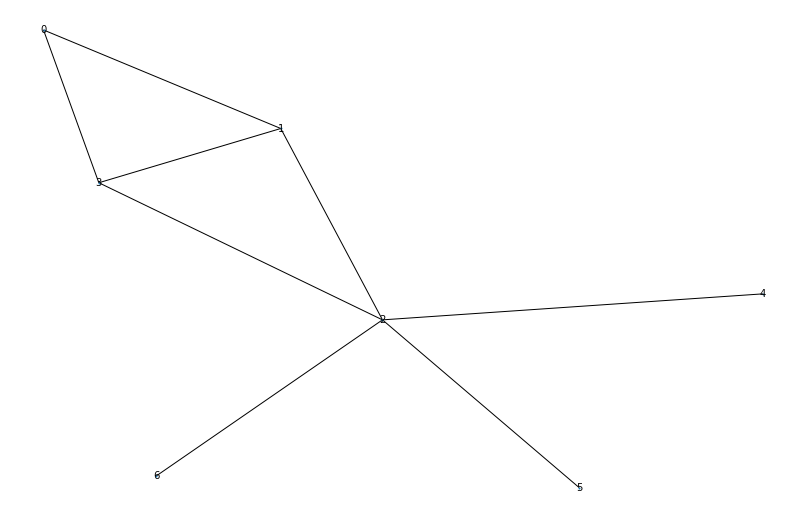

In [0]:
plot_grafo(G1)

### a-Grau de Distribuição




Crinado o dicionario de n1=(nó, grau), n1,n2,...n7
E juntamento com a função degree@networkx obtemos os graus armazenados em cada lacuna do array, respectivamente, cada nó

In [0]:
grau = dict(G1.degree()) # dicionario (nó , grau)
grau = list(grau.values()) # lista formada pelo grau ordenado pelo dicionario, 
# assim correspondendo ao nó representado em um array manipulável
grau = np.array(grau)
print("Grau: ", grau)

Grau:  [2 3 5 3 1 1 1]


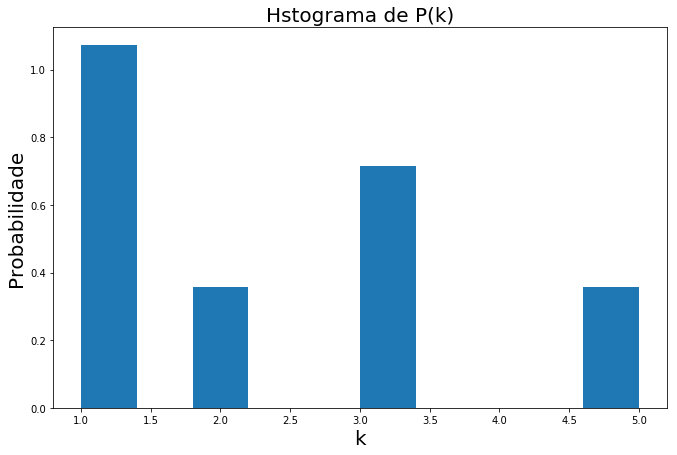

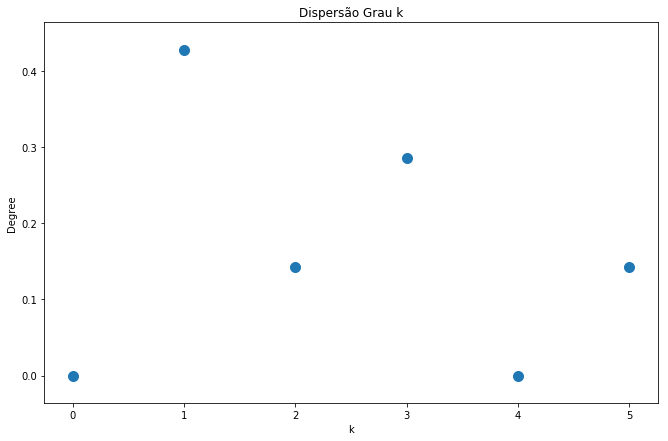

In [0]:
k,Pk = degree_distribution(G1,1)


### b- Coeficiente de Clustering local

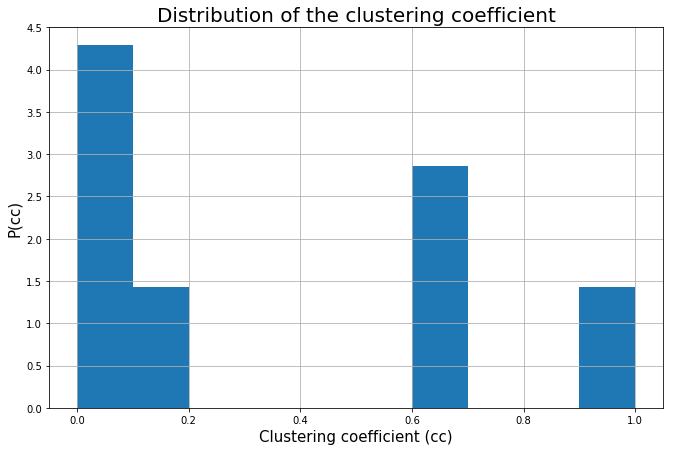

In [0]:
clustering_coefficient_distribution(G1)

### c- Transitividade

In [0]:
CC = (nx.transitivity(G1)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.3529


### d- Matrix de Distâncias

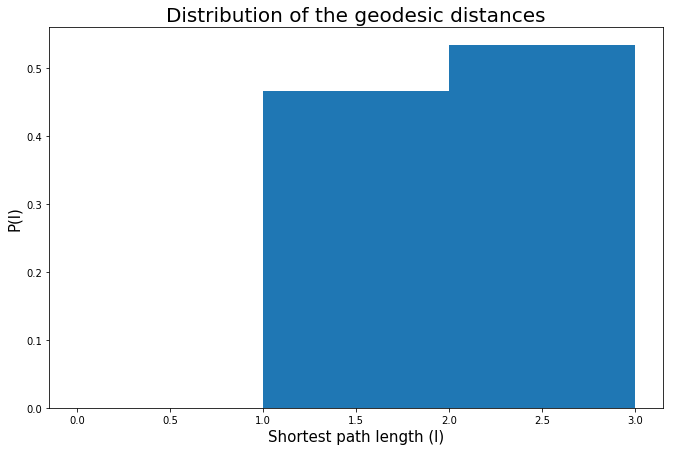

array([[0., 1., 2., 1., 3., 3., 0.],
       [1., 0., 1., 1., 2., 2., 0.],
       [2., 1., 0., 1., 1., 1., 0.],
       [1., 1., 1., 0., 2., 2., 0.],
       [3., 2., 1., 2., 0., 2., 0.],
       [3., 2., 1., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [0]:
distanceMatrix(G1, N)

### e- Entropia do grau de distribuição

Podemos calcular a entropia de um grafo através da entropia de Shannon, desta forma, indiciando o nivel de heterogenidade da rede

In [0]:
def shannon_entropy(G, op):
    k,Pk = degree_distribution(G, op)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H


Entropia de Shannon de distribuição grau

In [0]:
H = shannon_entropy(G1, 0)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  1.8424


### f- Segundo momento do grau de distribuição

In [0]:
k_2 =  momment_of_degree_distribution2(G1)
print("Segundo momento do grau de distribuição = ", k_2)
#nao e pra plotar o grafico aqui 

Segundo momento do grau de distribuição =  7.142857142857143


# Questão 2

 Implementar um programa para ler uma rede direcionada e ponderada e transformá-la em um
rede não ponderada e não direcionada. Considere a rede dos personagens de Les Miserables1
e o ecossistema da Flórida wet2
. Desenhe a rede dos personagens do romance Les Miserables,
versão ponderada e não ponderada.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


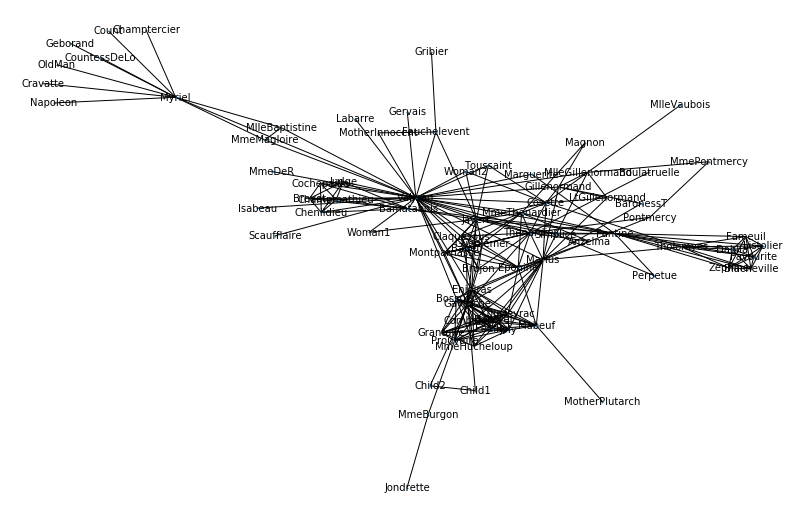

In [0]:
lm = nx.read_gml("/content/drive/Shared drives/Redes Complexas/lesmis.gml")
plot_grafo(lm)

In [0]:
eco = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/eco-foodweb-baywet.edges", nodetype=int , edgetype = float, comments  = "%", data=(('weight',float),))

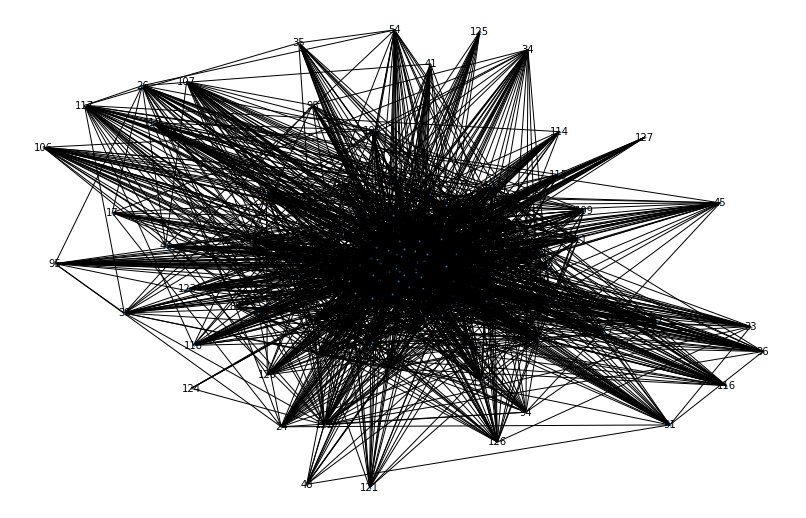

In [0]:
plot_grafo(eco)

# Questão 3

Convertendo o index da rede para numérico

In [0]:
lm_number= nx.convert_node_labels_to_integers(lm,label_attribute='string')


Plot e conferindo alterações da rede

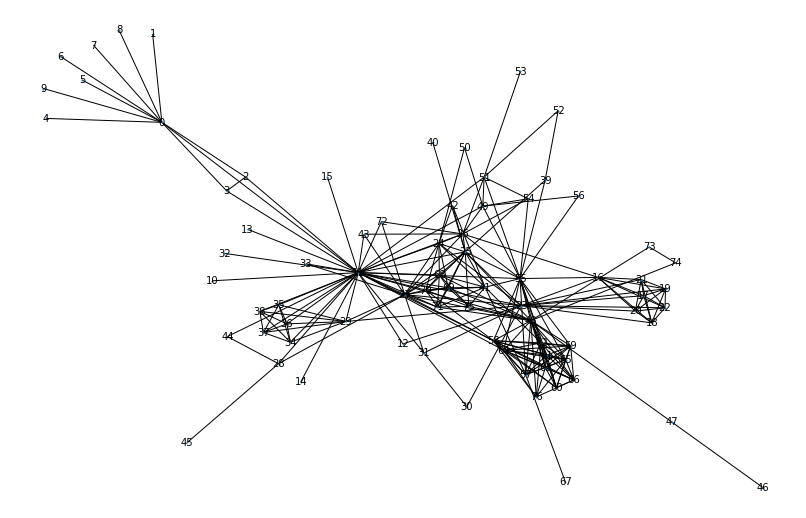

In [0]:
plot_grafo(lm_number)

In [0]:
def random_walk(x, steps, init):
  numberNode = nx.number_of_nodes(x)
  node = init
  
  visits = [0 for x in range(numberNode)]
  
  for i in range(steps):
    neighbors = x.neighbors(node)
    visits[node] += 1
    node = random.choice(list(neighbors))
  w =[]
  for i in range(numberNode):
    w.append(visits[i]/(steps*1.))
    
  return w


Montando as iterações com 3 possibilidades de nó inicio da caminhada<br>
e 3 possibilidade de steps

In [0]:
num_nodes=nx.number_of_nodes(lm_number)
init_random1 = random.randrange(0,num_nodes-1)
init_random2 = random.randrange(0,num_nodes-1)
init_random3 = random.randrange(0,num_nodes-1)
inits = [init_random1, init_random2, init_random3]
steps = [100,10000, 100000]
print("nós incicias")
print("primeiro: "+str(inits[0]))
print("segundo: "+str(inits[1]))
print("terceiro: "+str(inits[2]))
print("Steps")
print("primeiro: "+str(steps[0]))
print("segundo: "+str(steps[1]))
print("terceiro: "+str(steps[2]))






nós incicias
primeiro: 50
segundo: 55
terceiro: 58
Steps
primeiro: 100
segundo: 10000
terceiro: 100000


In [0]:
walk_iteracion = []
for i in range(len(inits)):
  for j in range(len(steps)):
    random_walk_les = random_walk(lm_number,steps[j], inits[i])
    walk_iteracion.append(list([random_walk_les,steps[j], inits[i]]))

In [0]:
degree = [0 for x in range(num_nodes)]
for i in range(num_nodes): 
  degree[i] = lm_number.degree[i]

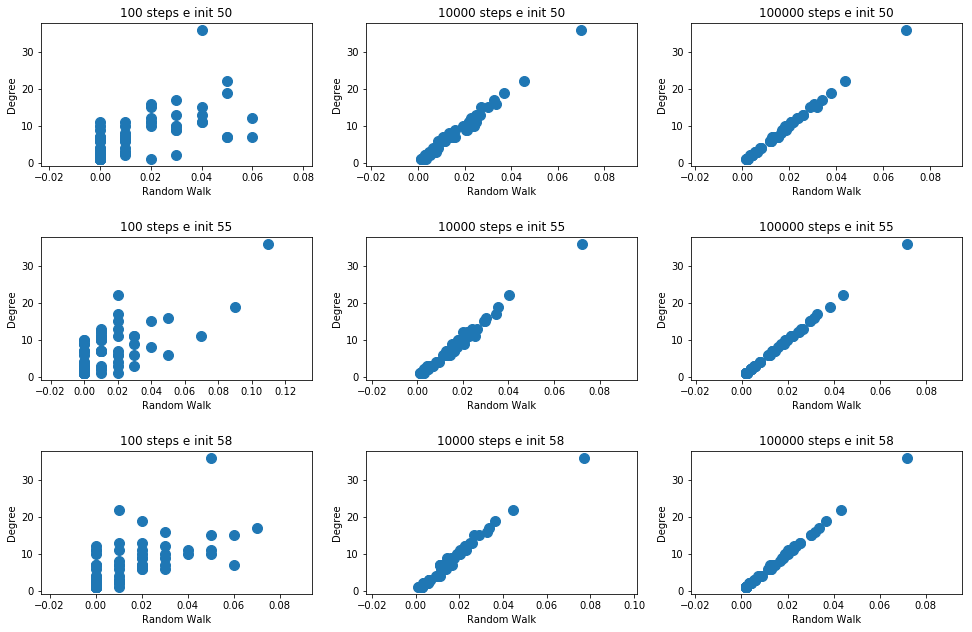

In [0]:
plt.figure(figsize  =[16.5, 10.5])
for i in range(len(steps)*len(inits)):
  plt.subplot(len(steps),len(inits),i+1)
  plt.xlabel('Random Walk')
  plt.ylabel('Degree')
  plt.title(str(walk_iteracion[i][1])+' steps e init '+str(walk_iteracion[i][2]))
  plt.subplots_adjust( hspace =0.5)
  plt.scatter(walk_iteracion[i][0], degree, s=100)
plt.show()

# **Questão 4**

Consider the following network.





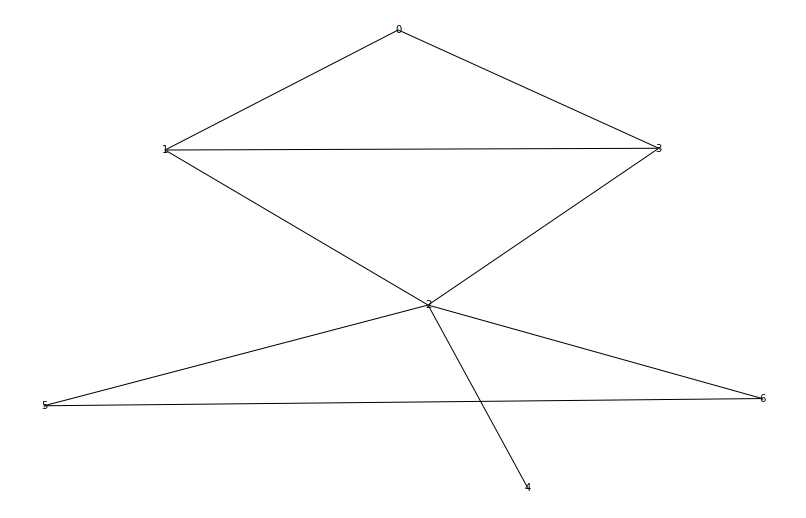

In [0]:
G4 = nx.Graph() #cria o grafo, adiciona os nós, cria as arestas e plota

G4.add_node('1')
G4.add_node('2')
G4.add_node('3')
G4.add_node('4')
G4.add_node('5')
G4.add_node('6')
G4.add_node('7')

G4.add_edge('1', '2')
G4.add_edge('1', '4')
G4.add_edge('2', '3')
G4.add_edge('2', '4')
G4.add_edge('3', '4')
G4.add_edge('3', '5')
G4.add_edge('3', '6')
G4.add_edge('3', '7')
G4.add_edge('6', '7')

G4 = nx.convert_node_labels_to_integers(G4, first_label=0)
plot_grafo(G4)

In [0]:
#criando  funcao para matriz Aij:
A = []
p = []
for i in range (0, 7) :
    x = np.zeros(len(G4))
    A.append(x)
A= np.array(A)
#print('A= \n', A)
    #[nrow, ncol] = np.shape(A)
    #print("Numero de linhas:", nrow, "\nNumero de colunas:", ncol,)
for edge in G4.edges(data=False):
      A[edge[0]-1][edge[1]-1]= A[edge[1]-1][edge[0]-1]=1 
print('A= \n', A)
#pegando o GRau do grapho
dgr = dict(G4.degree()) # dicionario (nó , grau)
dgr = list(dgr.values()) # lista formada pelo grau ordenado pelo dicionario, 
# assim correspondendo ao nó representado em um array manipulável
dgr = np.array(dgr)
print("\nGrau: ", dgr)
#Criando a matrix P:
for i in range(0, 7) :
    for j in range (0, 7) :
        A[i][j] = (A[i][j]/ dgr[i])
P = A
print('P= \n', P) # MELHORAR ESSE PRINT
print("\n")
#funcao para calcular o power  of the probability matrix
P = multMatrix(P, P)
print('P= \n', P) 
#funcao para calcular o limite quando n tende ao infinito de P^n
P = lmtP(P , 4)
print('P= \n', P) 


A= 
 [[0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 1. 1. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]]

Grau:  [2 3 5 3 1 2 2]
P= 
 [[0.         0.5        0.5        0.         0.         0.
  0.5       ]
 [0.33333333 0.         0.33333333 0.33333333 0.33333333 0.33333333
  0.        ]
 [0.2        0.2        0.         0.         0.         0.
  0.2       ]
 [0.         0.33333333 0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         1.
  0.        ]
 [0.         0.5        0.         0.         0.5        0.
  0.        ]
 [0.5        0.         0.5        0.         0.         0.
  0.        ]]


P= 
 [[0.51666667 0.1        0.41666667 0.16666667 0.16666667 0.16666667
  0.1       ]
 [0.06666667 0.84444444 0.16666667 0.         0.16666667 0.33333333
  0.23333333]
 [0.16666667 0.1        0.26666667 0.06666667 0.06666667 0.06666667
  0.1       ]
 [0.11111111 0.  

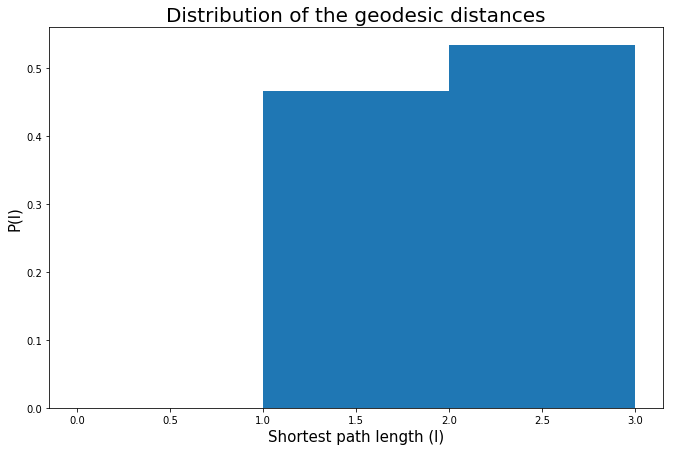

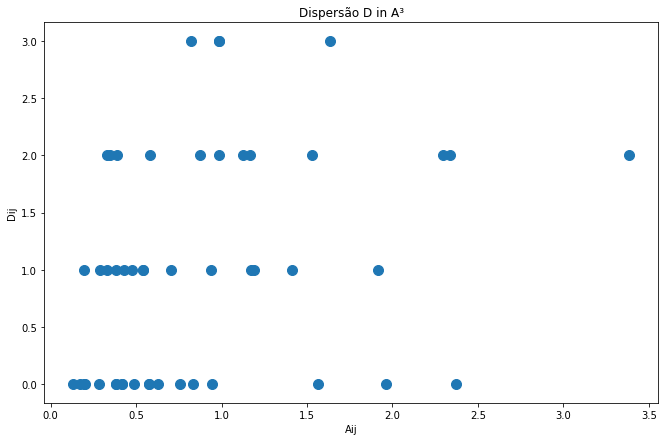

In [0]:
D = distanceMatrix(G4,len(G4))
plt.xlabel('Aij')
plt.ylabel('Dij')
plt.title("Dispersão D in A³")
plt.scatter(P, D, s=100)

# Questão 5


Para Questão 5 usaremos a rede lemis para calcular a distribuição degree e a power law correspondente




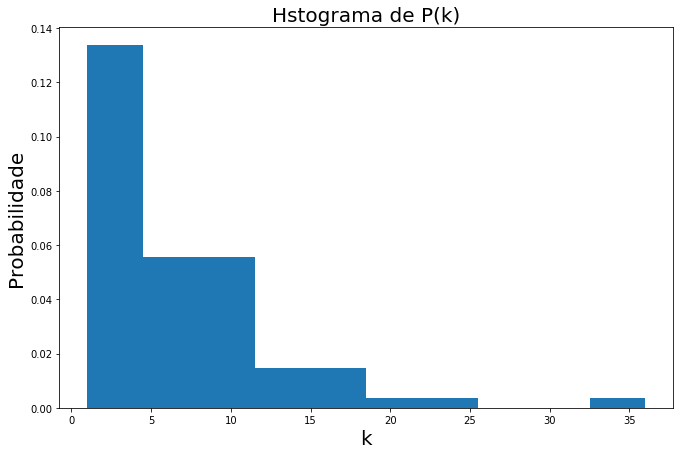

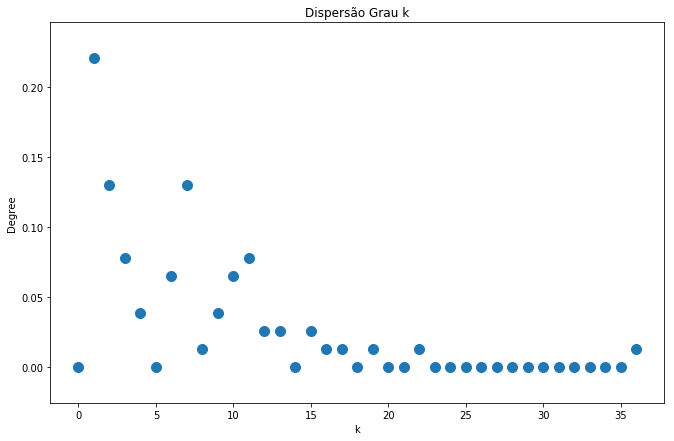

In [0]:
k,Pk = degree_distribution(lm_number,1)

Considerando que trata-se de uma rede scale-free e que a distribuição segue a distribuição de normal, P(k) segue a reta em log(P(k))= C + Log(k)

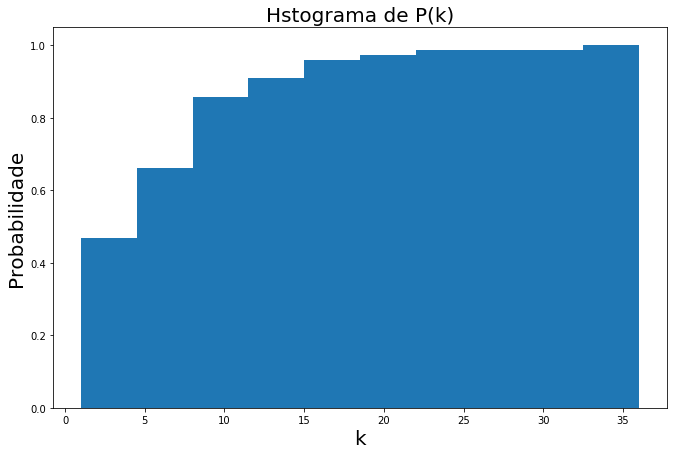

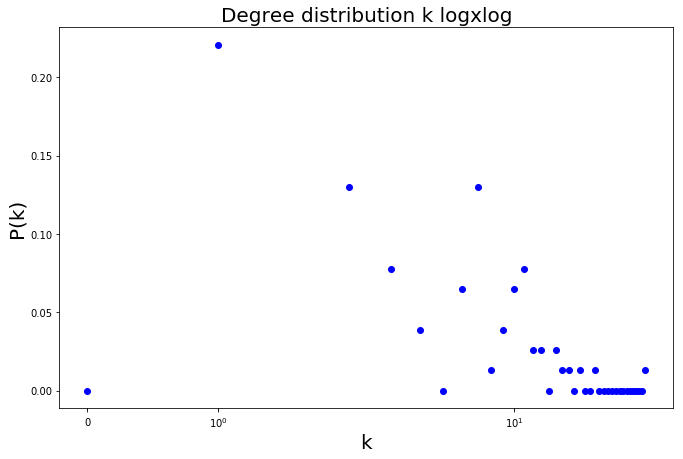

In [0]:
ks, pk =degree_distribution_log(lm_number,1)

# Questão 7

Compare the average clustering coefficient (equation ?? ) and the transitivity (equation ??)
of the following networks.<br>
Why do C and CL diverge in some networks?

### A - E-road network (http://konect.cc/networks/subelj_euroroad)

Recolhendo os dados

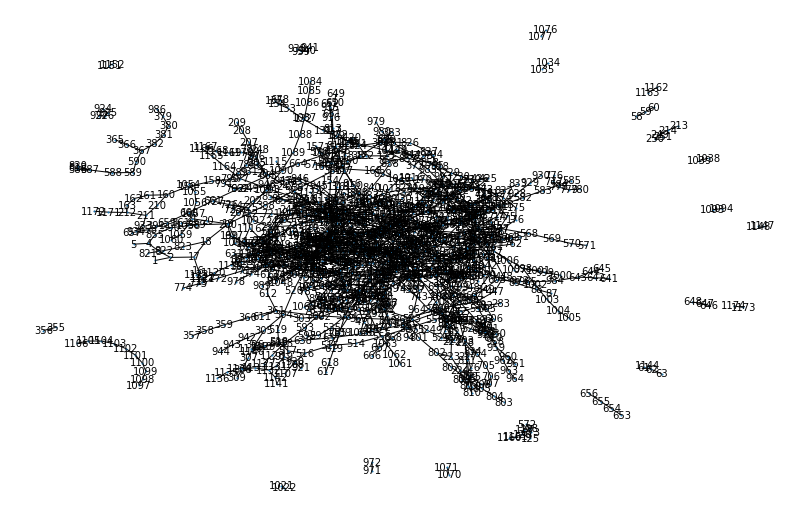

In [0]:
road = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/euroroad.txt", nodetype=int , comments  = "%")
plot_grafo(road)

In [0]:
number_road = nx.number_of_nodes(road)

Converteremos o label do grafico para inteiro, assim ordenável e percorrível

In [0]:
road_int= nx.convert_node_labels_to_integers(road,first_label=0)

### Calculo do coeficiente de agrupamento local

Utilizando a função **clustering**@networkx medidando o agrupamento local

In [0]:
ClustPlace = []
for i in road_int.nodes():
    ClustPlace.append(nx.clustering(road_int, i))
print(ClustPlace)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0.1, 0, 0, 0.2, 0.16666666666666666, 0, 0.2, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03571428571428571, 0, 0, 0.16666666666666666, 0, 0.16666666666666666, 0, 0, 0, 0.047619047619047616, 0, 0, 0.3333333333333333, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0.1, 0.16666666666666666, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0.1, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0.06666666666666667, 0, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.3333333333333333, 0.03571428571428571, 0, 0, 0, 0, 0, 0.06666666666666667, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Veremos a distribuição do clustering Local

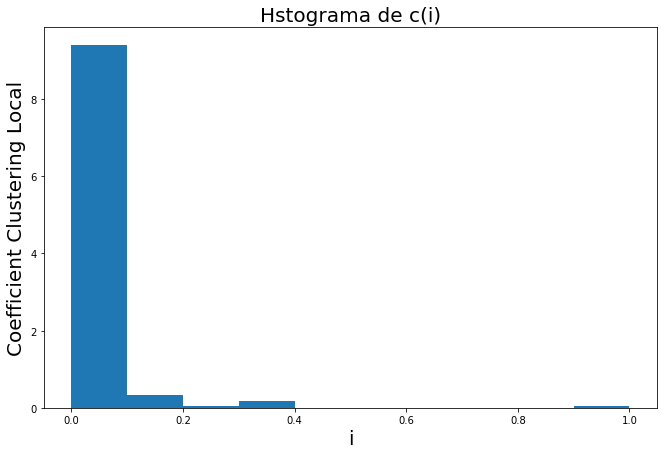

In [0]:
plt.hist(ClustPlace, density = True)
plt.xlabel('i', fontsize=20)
plt.ylabel('Coefficient Clustering Local', fontsize=20)
plt.title("Hstograma de c(i)", fontsize=20)
plt.show()

Cl adiquitido

In [0]:
sum = 0
for i in road_int.nodes():
  sum += ClustPlace[i]
clRoad = sum/number_road
clRoad

0.016731564857629593

Utilizando a função **average coeficient clustering**@networkx calculando o agrupamento global

In [0]:
averageClustRoad = nx.average_clustering(road)
averageClustRoad

0.016731564857629593

Utilizando a função **transitivity**@networkx 

In [0]:
transitivityRoad = nx.transitivity(road)
transitivityRoad

0.0338863395693611

### B - Facebook user-user friendships (http://konect.uni-koblenz.de/networks/ego-facebook)

Recolhendo os dados

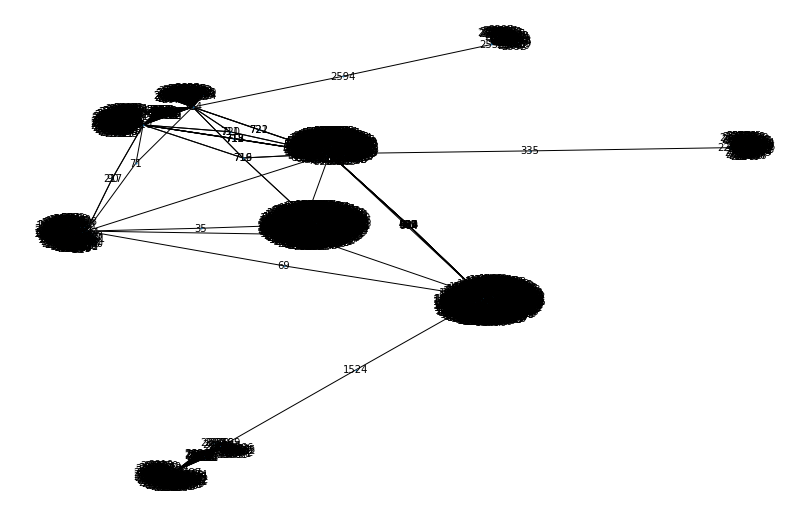

In [0]:
face = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/ego-facebook/out.ego-facebook", nodetype=int , comments  = "%")
plot_grafo(face)

In [0]:
number_face = nx.number_of_nodes(face)

Converteremos o label do grafico para inteiro, assim ordenável e percorrível

In [0]:
face_int= nx.convert_node_labels_to_integers(face,first_label=0)

Utilizando a função **clustering**@networkx medidando o agrupamento local

In [0]:
ClustPlace1 = []
for i in face_int.nodes():
    ClustPlace1.append(nx.clustering(face_int, i))
print(ClustPlace1)

[2.436587802441461e-05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0002338877338877339, 0, 3.3864325964456e-05, 0.0021390374331550803, 0.005108956313

Veremos a distribuição do clustering Local

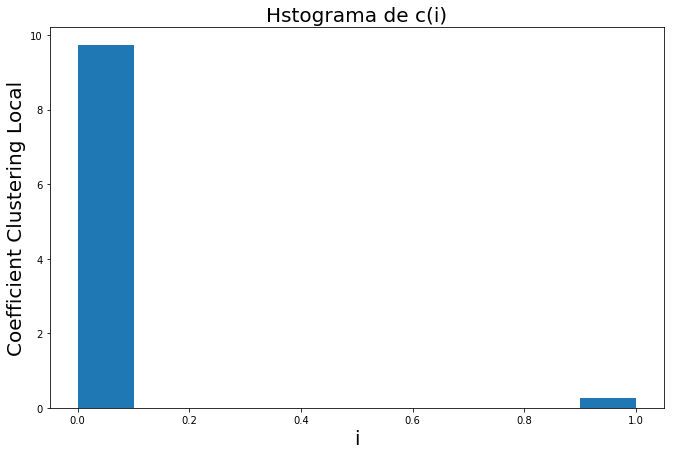

In [0]:
plt.hist(ClustPlace1, density = True)
plt.xlabel('i', fontsize=20)
plt.ylabel('Coefficient Clustering Local', fontsize=20)
plt.title("Hstograma de c(i)", fontsize=20)
plt.show()

Cl adiquitido

In [0]:
sum = 0
for i in face_int.nodes():
  sum += ClustPlace1[i]
clface = sum/number_face
clface

0.027247421431211827

Utilizando a função **average coeficient clustering**@networkx

In [0]:
averageClustFace = nx.average_clustering(face)
averageClustFace

0.027247421431211827

Utilizando a função **transitivity**@networkx 

In [0]:
transitivityFace = nx.transitivity(face)
transitivityFace

0.0003593802862141459

### C - Collaboration of authors of scientific papers from the arXiv’s Astrophysics (http://konect.uni-koblenz.de/networks/ca-AstroPh),

Recolhendo os dados

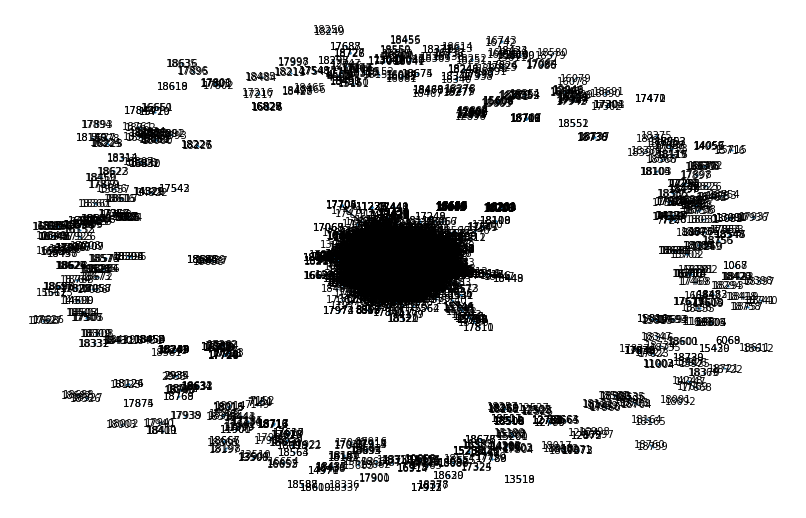

In [0]:
astros = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/ca-AstroPh/out.ca-AstroPh", nodetype=int , comments  = "%")
plot_grafo(astros)

In [0]:
number_astros = nx.number_of_nodes(astros)

Converteremos o label do grafico para inteiro, assim ordenável e percorrível

In [0]:
astros_int= nx.convert_node_labels_to_integers(astros,first_label=0)

Utilizando a função **clustering**@networkx medidando o agrupamento local

In [0]:
ClustPlace2 = []
for i in astros_int.nodes():
    ClustPlace2.append(nx.clustering(astros_int, i))
print(ClustPlace2)

[0.07567567567567568, 0.11612903225806452, 0.24141749723145073, 1.0, 0.2292134831460674, 0.12427409988385599, 0.11878893234825438, 0.31494252873563217, 0.13084702907711757, 1.0, 0.1164021164021164, 0.4642857142857143, 0.15367249858905105, 1.0, 0.14102564102564102, 0.17293233082706766, 0.20317460317460317, 0.0838703793774319, 0.24242424242424243, 0.2012119851868477, 0.32794612794612793, 0.16401788785689714, 0.5, 0.1920656634746922, 0.2571428571428571, 0.1509585305205743, 0.13691026827012026, 0.08791208791208792, 0.19047619047619047, 0.14263982102908276, 1.0, 0.3484848484848485, 0.10989010989010989, 0.6666666666666666, 0.1191553544494721, 0.16010854816824965, 0.16164762893734858, 0.21652421652421652, 0.1585256218160024, 0.167816091954023, 0.053410893707033315, 0.5238095238095238, 0.14692202462380302, 0.18963922294172064, 0.23114754098360657, 0.2857142857142857, 0.336734693877551, 0.13243118204950266, 0.28780487804878047, 0.22727272727272727, 0.6, 0.23588709677419356, 0.37894736842105264,

Veremos a distribuição do clustering Local

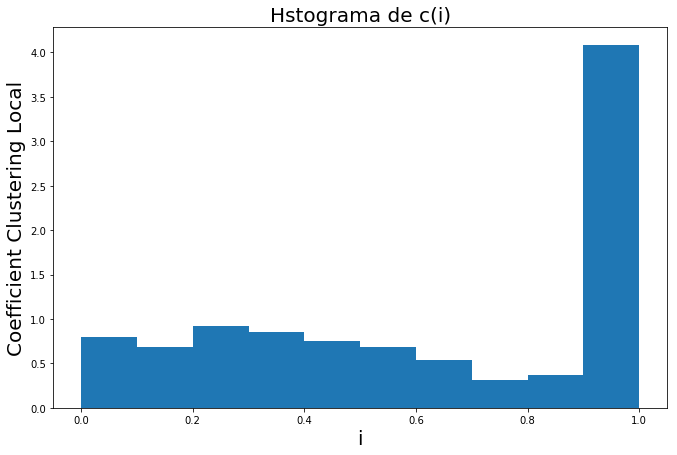

In [0]:
plt.hist(ClustPlace2, density = True)
plt.xlabel('i', fontsize=20)
plt.ylabel('Coefficient Clustering Local', fontsize=20)  
plt.title("Hstograma de c(i)", fontsize=20)
plt.show()

Cl adiquitido

In [0]:
suma = 0
for i in astros_int.nodes():
  suma += ClustPlace2[i]
clastros = suma/number_astros
clastros

0.630626835185028

Utilizando a função **average coeficient clustering**@networkx

In [0]:
averageClustAstros = nx.average_clustering(astros)
averageClustAstros

0.630626835185028

Utilizando a função **transitivity**@networkx 

In [0]:
transitivityAstros = nx.transitivity(astros)
transitivityAstros

0.3180015812533629

### D - Hamsterster friendships (http://konect.uni-koblenz.de/networks/petster-friendships-hamster).


Recolhendo os dados

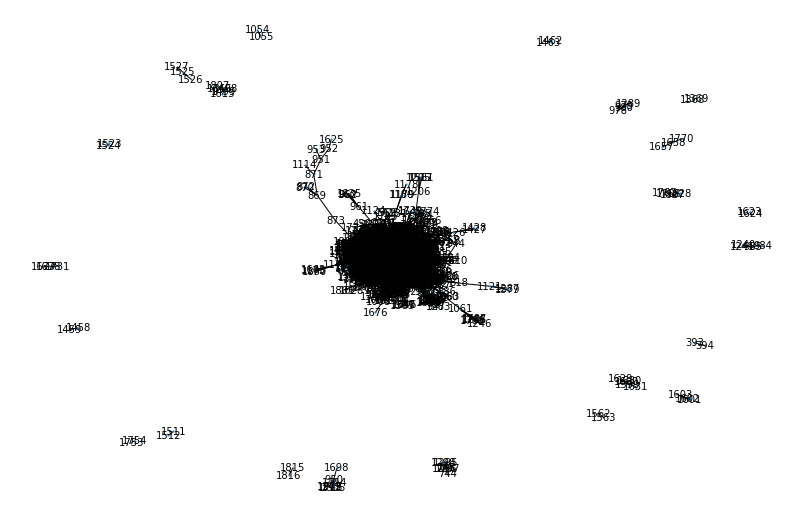

In [0]:
hams = nx.read_edgelist("/content/drive/Shared drives/Redes Complexas/petster-friendships-hamster/out.petster-friendships-hamster-uniq", nodetype=int ,comments  = "%")
plot_grafo(hams)

In [0]:
number_hams = nx.number_of_nodes(hams)

Converteremos o label do grafico para inteiro, assim ordenável e percorrível

In [0]:
hams_int= nx.convert_node_labels_to_integers(hams, first_label=0)

Utilizando a função **clustering**@networkx medidando o agrupamento local

In [0]:
ClustPlace3 = []
for i in hams_int.nodes():
    ClustPlace3.append(nx.clustering(hams_int, i))
print(ClustPlace3)

[0.20512820512820512, 0.08484848484848485, 0.3333333333333333, 0.058823529411764705, 0.16666666666666666, 0.06666666666666667, 0.07272727272727272, 0, 0.03801546391752577, 0.035996488147497806, 0.02217741935483871, 0.020689655172413793, 0.018145161290322582, 0.01839080459770115, 0.0777489818585709, 0.024787997390737115, 0.044444444444444446, 0.125, 0.03349985307081987, 0, 0, 0.23891625615763548, 0, 0, 0.05742574257425743, 0.1010752688172043, 0.1010752688172043, 0.08912655971479501, 0.05084745762711865, 0.051094890510948905, 0.03785835580861053, 0.045787545787545784, 0.09803921568627451, 0.09042553191489362, 0.21428571428571427, 0.022895622895622896, 0.022857142857142857, 0.07311827956989247, 0.06552706552706553, 0.08163265306122448, 0.11614401858304298, 0.03571428571428571, 0.10476190476190476, 0.19696969696969696, 0.07459677419354839, 0.061016949152542375, 0.14545454545454545, 0.0761904761904762, 0.07407407407407407, 0.0761904761904762, 0.1293746414228342, 0.12602566799915843, 0.10921

Veremos a distribuição do clustering Local

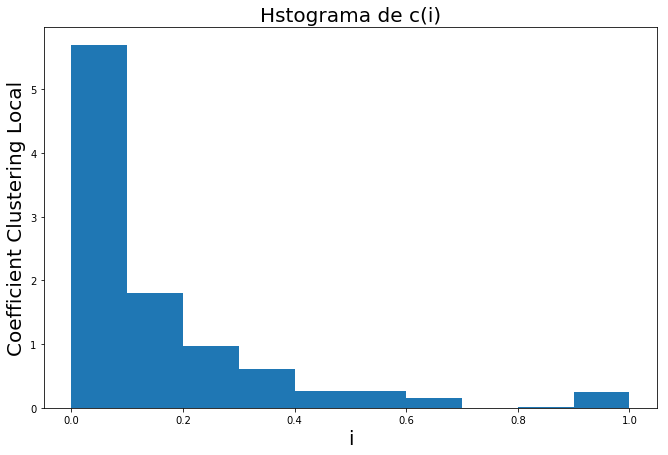

In [0]:
plt.hist(ClustPlace3, density = True)
plt.xlabel('i', fontsize=20)
plt.ylabel('Coefficient Clustering Local', fontsize=20)
plt.title("Hstograma de c(i)", fontsize=20)
plt.show()

Cl adiquitido

In [0]:
sum = 0
for i in hams_int.nodes():
  sum += ClustPlace3[i]
clhams = sum/number_hams
clhams

0.1413864121675117

Utilizando a função **average coeficient clustering**@networkx

In [0]:
averageClustHams = nx.average_clustering(hams)
averageClustHams

0.1413864121675117

Utilizando a função **transitivity**@networkx 

In [0]:
transitivityHams = nx.transitivity(hams)
transitivityHams

0.09040338801314042

# Questão 6

Determine the cumulative distribution of the degree distribution of the following networks.
Are some networks scale-free? Use only the largest component.

### a - E-road network (http://konect.cc/networks/subelj_euroroad),

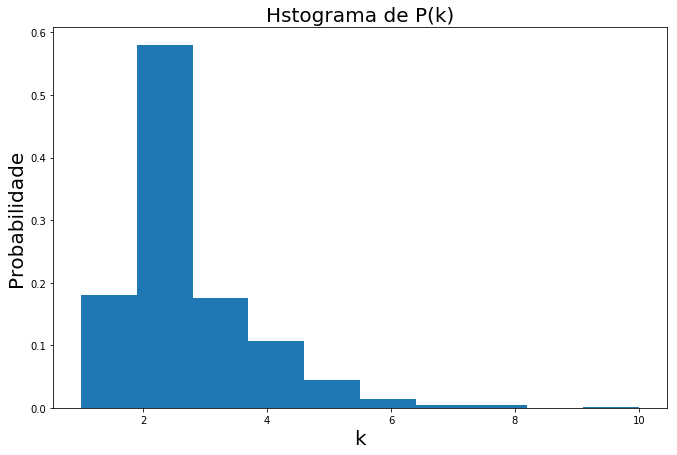

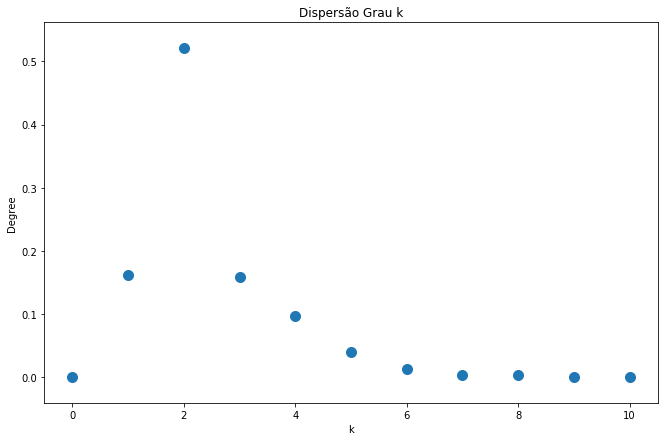

In [0]:
ks, pk = degree_distribution(road_int,1)

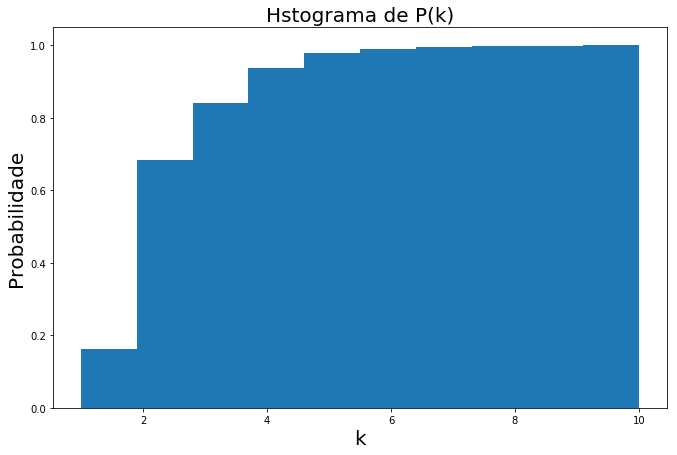

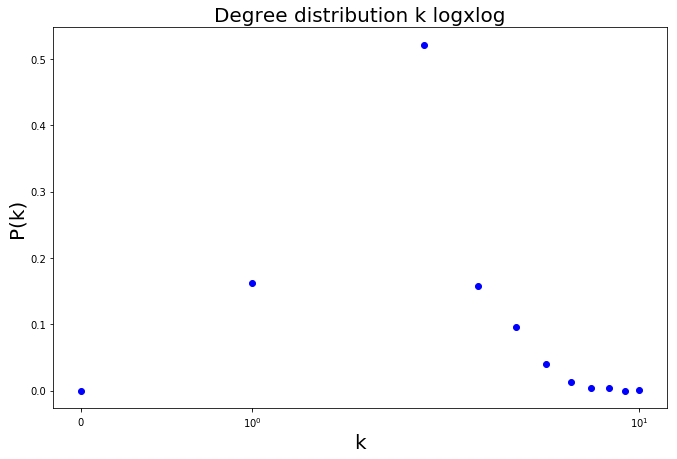

In [0]:
ks, pk = degree_distribution_log(road_int,1)

### b - Facebook user-user friendships (http://snap.stanford.edu/data/egonets-Facebook.html)

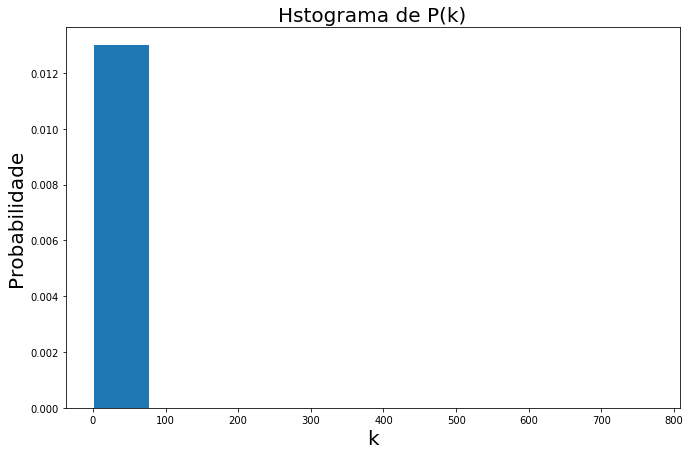

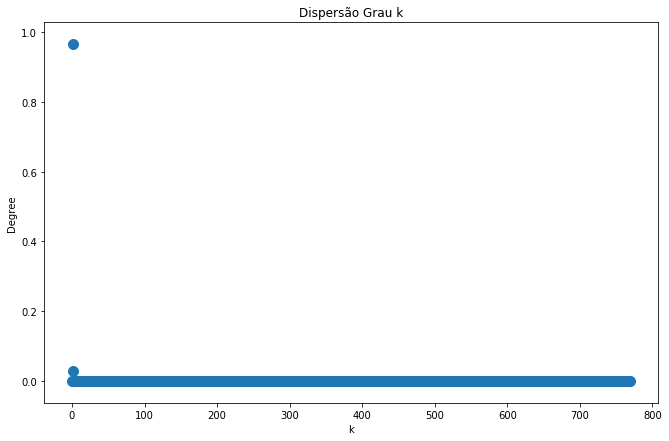

In [0]:
ks,pk=degree_distribution(face_int,1)

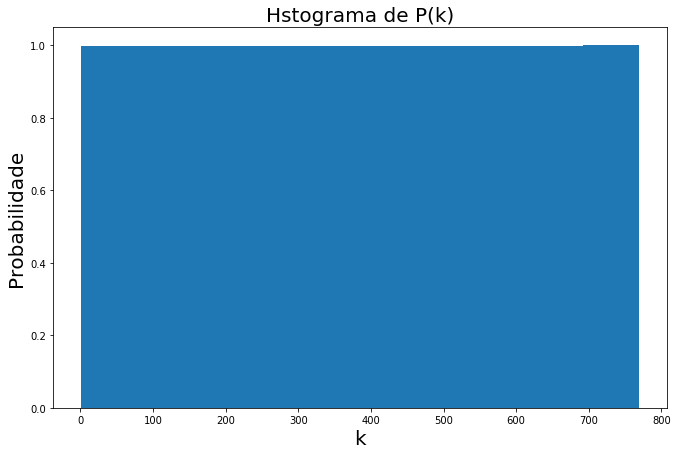

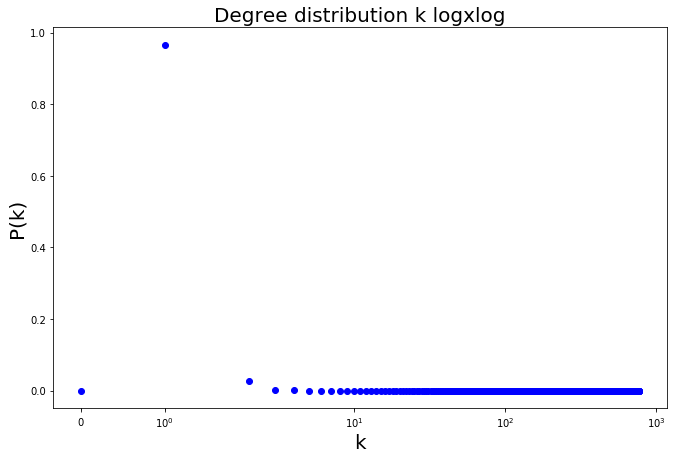

In [0]:
ks,pk = degree_distribution_log(face_int, 1)

### c - A coauthorship network among scientists working on network science, from 2006.
(http://www-personal.umich.edu/~mejn/netdata/netscience.zip),

In [0]:
cien = nx.read_gml("/content/drive/Shared drives/Redes Complexas/netscience.gml")
cien= nx.convert_node_labels_to_integers(cien,first_label=0)


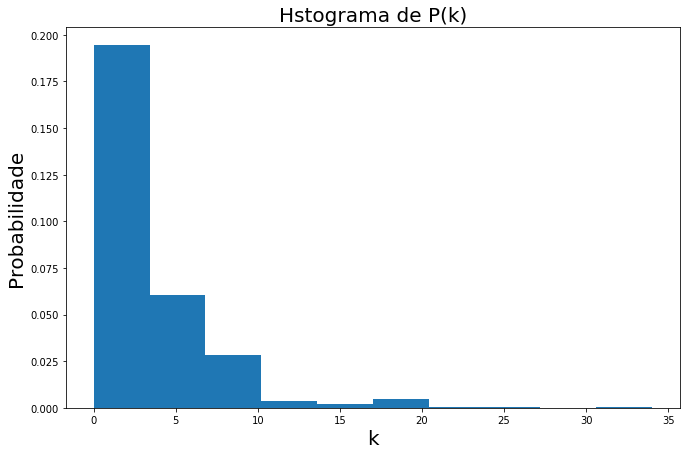

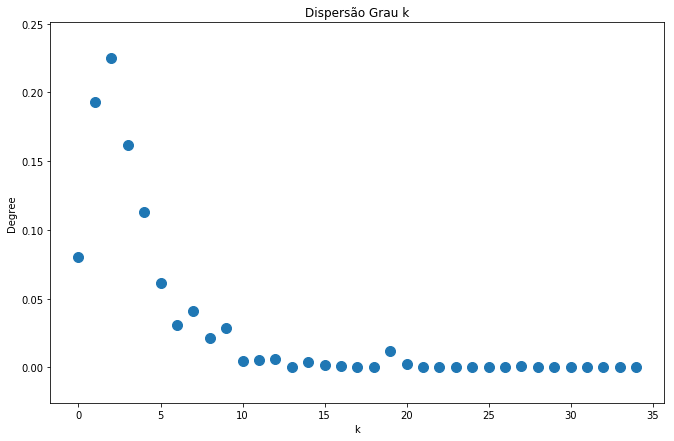

In [0]:
ks,pk = degree_distribution(cien, 1)

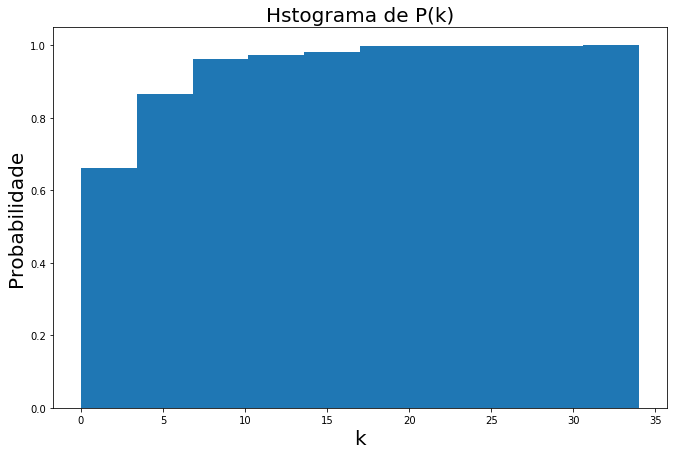

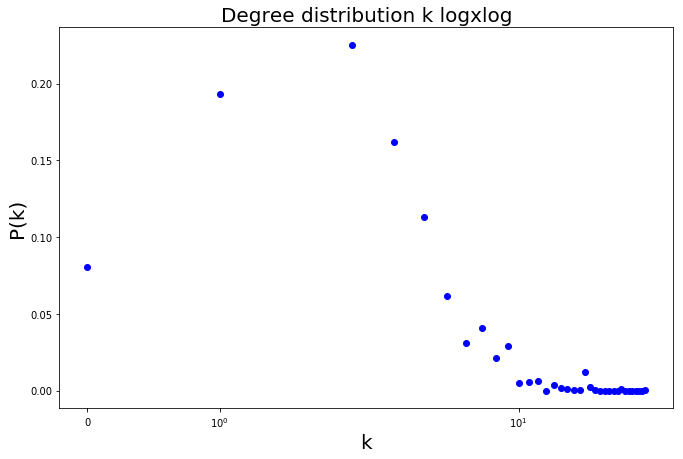

In [0]:
ks,pk = degree_distribution_log(cien, 1)

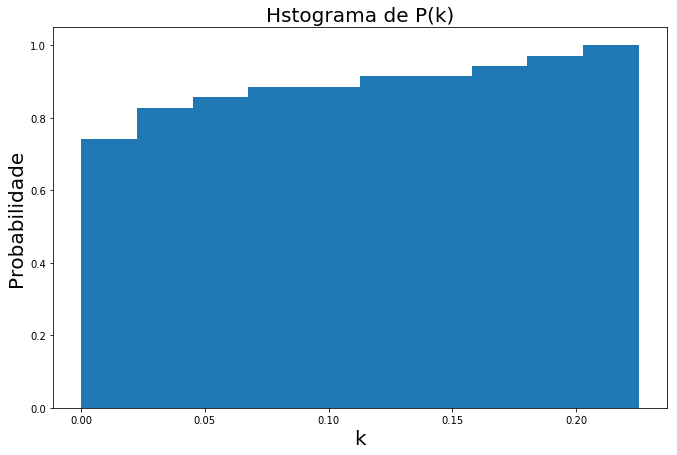

In [0]:
plt.hist(pk, bins  = 10, density=True, cumulative=True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Probabilidade', fontsize=20)
plt.title("Hstograma de P(k)", fontsize=20)
plt.show()

### d - Hamsterster friendships
(http://konect.uni-koblenz.de/networks/petster-friendships-hamster).

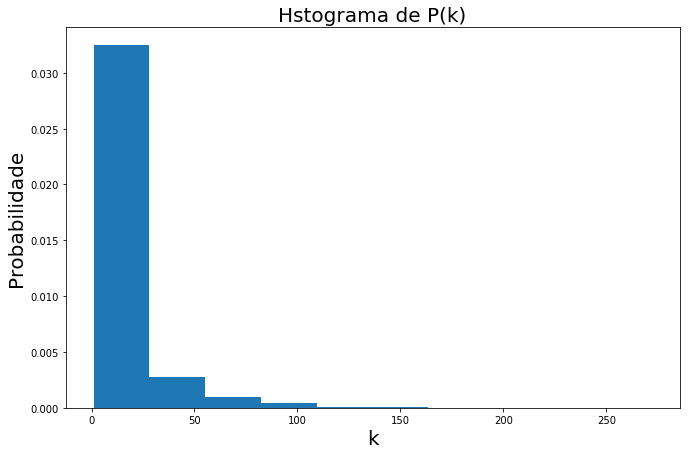

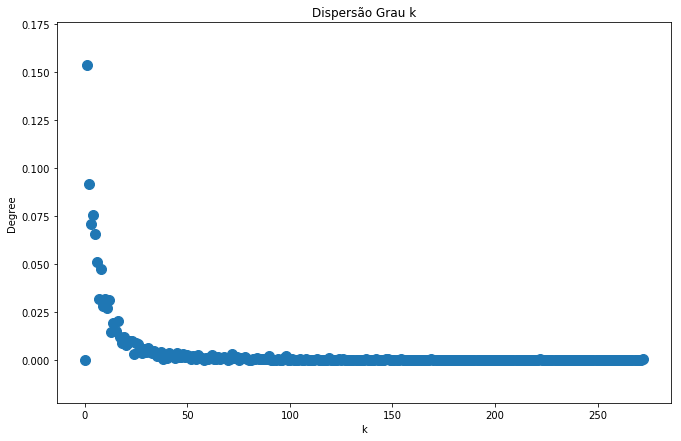

In [0]:
ks,pk = degree_distribution(hams_int, 1)

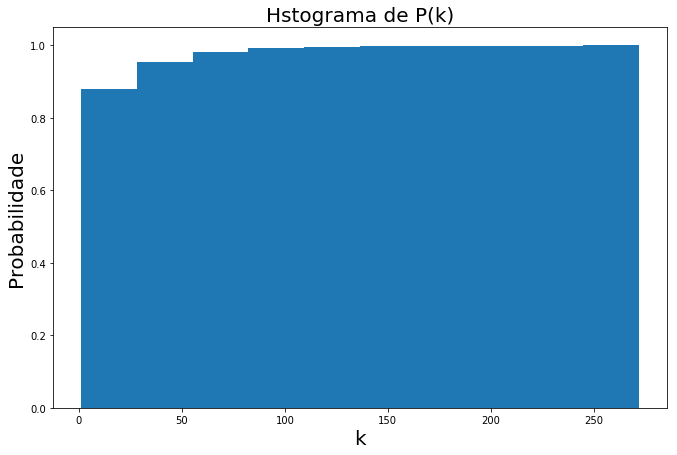

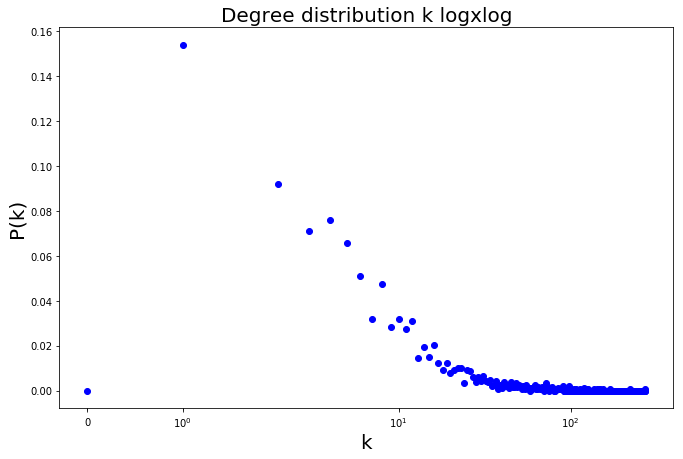

In [0]:
ks,pk = degree_distribution_log(hams_int, 1)

As redes c e d aparenta estar nos parametros graficos do scale-free

# Questão 8

Calculate the distribution of the shortest path of the following networks.<br>
Compare the distributions and relate then with the scale-free nature of the networks.

Reaproveitando leitura de lista de arestas e conversão de label ´para inteiro da questão 7



### A - E-road network (http://konect.cc/networks/subelj_euroroad),

In [0]:
if nx.is_connected(road_int) == True:
  averageSPRoad = nx.average_shortest_path_length(road_int)
  diameterRoad = nx.diameter(road_int)
else:
  averageSPRoad = 0
  diameterRoad = 0
  print("The graph has more than one connected component")

The graph has more than one connected component


In [0]:
#Como a matriz de shortest path é simétrica calcumaremos apenas o triangulo superior
def histShortestPath(G): 
  if nx.is_connected(G) == True:
      N = nx.number_of_nodes(G)
      D = zeros(shape=(N,N)) # Definindo matriz de caminhos cursos entre nós
      sumSP = [] # vetor somatória de Shortest Path
      for i in arange(0,N): # percorrendo as linhas
          for j in arange(i+1, N): #percorendo as colunas do triangulo superior da matriz 
              if(i != j):#apenas garantindo que não pegaremos a diagornal
                  aux = nx.shortest_path(G,i,j)#obtendo lista caminhos curtos
                  dij = len(aux)-1 # para retirarmos a quantidade de aresta pelo nós intermediarios a aux[0] e aux[n]
                  D[i][j] = dij # armazenando na matriz
                  D[j][i] = dij # replicano no triangulo inferior da matriz
                  sumSP.append(dij) # add quantidade no vetor
      d = nx.diameter(G) #Diametro da rede
      x = range(0,d+1)
      plt.hist(sumSP, bins = x, density=True) # importante normed padroniza as conexoes considerando tanto a matriz toda quanto apenas um dos triangulos
      plt.title("Distribution of the geodesic distances", fontsize=20)
      plt.ylabel("P(l)", fontsize=15)
      plt.xlabel("Shortest path length (l)", fontsize=15)
      #plt.grid(True)
      plt.savefig('av_short_path.eps')
      plt.show(True)
  else:
      print("The graph has more than one connected component")

In [0]:
histShortestPath(road_int)

The graph has more than one connected component


### B - Facebook user-user friendships (http://konect.uni-koblenz.de/networks/ego-facebook)

In [0]:
if nx.is_connected(face_int) == True:
  averageSPFace = nx.average_shortest_path_length(face_int)
  diameterFace = nx.diameter(face_int)
else:
  averageSPFace = 0
  diameterFace = 0
  print("The graph has more than one connected component")

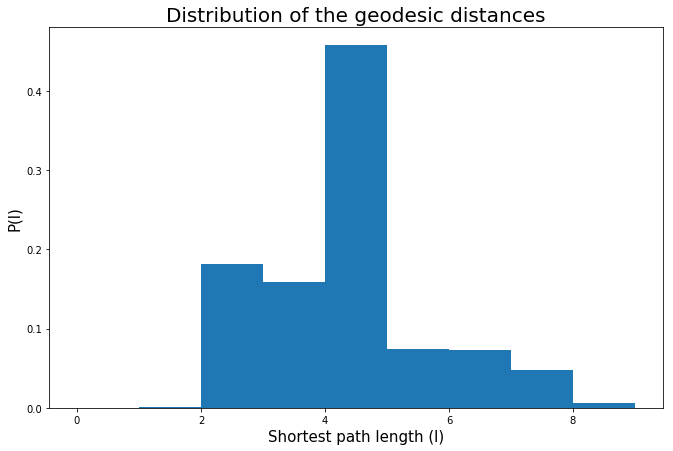

In [0]:
histShortestPath(face_int)

### C - Collaboration of authors of scientific papers from the arXiv’s Astrophysics (http://konect.uni-koblenz.de/networks/ca-AstroPh),

In [0]:
if nx.is_connected(astros_int) == True:
  averageSPAstros = nx.average_shortest_path_length(astros_int)
  diameterAstros = nx.diameter(astros_int)
else:
  averageSPAstros = 0
  diameterAstros = 0
  print("The graph has more than one connected component")

The graph has more than one connected component


In [0]:
histShortestPath(astros_int)

The graph has more than one connected component


### D - Hamsterster friendships (http://konect.uni-koblenz.de/networks/petster-friendships-hamster).

In [0]:
if nx.is_connected(hams_int) == True:
  averageSPHams = nx.average_shortest_path_length(hams_int)
  diameterHams = nx.diameter(hams_int)
else:
  averageSPHams = 0
  diameterHams = 0
  print("The graph has more than one connected component")

The graph has more than one connected component


In [0]:
histShortestPath(hams_int)

The graph has more than one connected component


# Questão 9

Nome das redes comparadas

In [0]:
nomes = ['Road','Face','Astros','Hams']

Numeros de nós

In [0]:
number_nodes_redes = [len(road_int),len(face_int),len(astros_int),len(hams_int)]

transitivity das redes

In [0]:
transitivity = [round(transitivityRoad,2),round(transitivityFace,2),round(transitivityAstros,2),round(transitivityHams,2)]

Grau médio das redes

In [0]:
averageDegree = [round(averagedegree(road_int),2),round(averagedegree(face_int),2),round(averagedegree(astros_int),2),round(averagedegree(hams_int),2)]

Agrupamento médio das redes

In [0]:
averageClust = [round(averageClustRoad,2),round(averageClustFace,2),round(averageClustAstros,2),round(averageClustHams,2)]

Média dos caminhos curtos

In [0]:
averageSP = [round(averageSPRoad,2),round(averageSPFace,2),round(averageSPAstros,2),round(averageSPHams,2)]

Diameter das redes

In [0]:
diameter = [round(diameterRoad,2),round(diameterFace,2),round(diameterAstros,2),round(diameterHams,2)]

Segundo momento estatistico

In [0]:
segMomen = [momment_of_degree_distribution2(road_int),momment_of_degree_distribution2(face_int),momment_of_degree_distribution2(astros_int),momment_of_degree_distribution2(hams_int)]

Vetor das medidas das redes

In [0]:
data = [nomes,number_nodes_redes, averageDegree,averageClust,segMomen,transitivity,averageSP,diameter]

In [0]:
index = ["nomes","Numero de nós", "Média do Grau","Média de Agrupamento","Segundo momento estatistico", "Transitividade", "Média de Shortest Path", "Diamentro"]

Preparando DataFrame@pandas para exibição dos dados

In [0]:
medidas_view = pd.DataFrame(data, index=index)

In [0]:
header = medidas_view.iloc[0]
medidas_view = medidas_view.drop(index="nomes")
medidas_view.columns = header

In [0]:
medidas_view


nomes,Road,Face,Astros,Hams
Numero de nós,1174,2888,18771,1858
Média do Grau,2.41,2.06,21.1,13.49
Média de Agrupamento,0.02,0.03,0.63,0.14
Segundo momento estatistico,7.2402,528.132,1379.51,611.815
Transitividade,0.03,0,0.32,0.09
Média de Shortest Path,0,3.87,0,0
Diamentro,0,9,0,0


# Questão 10

In [0]:
data_cidades = []

In [0]:
saopaulo = nx.read_graphml("/content/drive/Shared drives/Redes Complexas/Sao_Paulo.graphml.xml")
saopaulo= nx.convert_node_labels_to_integers(saopaulo,first_label=0)
#plot_grafo(saopaulo)

In [0]:
ks,pk = degree_distribution(saopaulo,0)
data_cidades.append([pk,ks])

In [0]:
newyork = nx.read_graphml("/content/drive/Shared drives/Redes Complexas/New_York.graphml.xml")
newyork= nx.convert_node_labels_to_integers(newyork,first_label=0)
#plot_grafo(newyork)

In [0]:
ks,pk = degree_distribution(newyork,0)
data_cidades.append([pk,ks])

In [0]:
paris = nx.read_graphml("/content/drive/Shared drives/Redes Complexas/Paris.graphml.xml")
paris= nx.convert_node_labels_to_integers(paris,first_label=0)
#plot_grafo(paris)

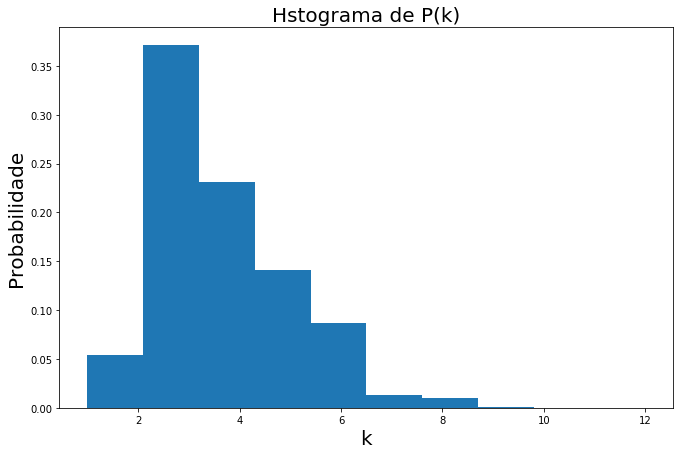

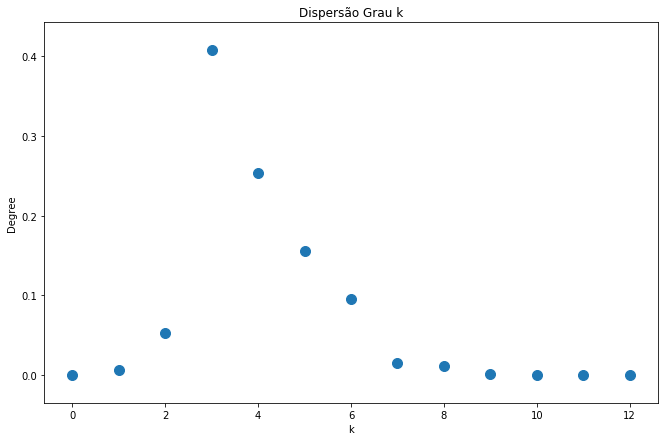

In [0]:
ks,pk = degree_distribution(paris,1)
data_cidades.append([pk,ks])

AttributeError: ignored

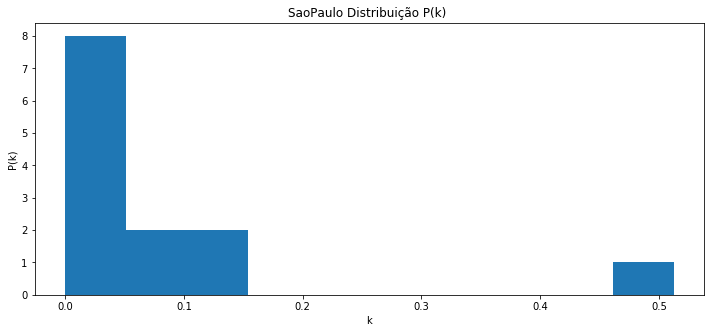

In [0]:
cidades =  ['SaoPaulo','Newyork','Paris']
plt.figure(figsize  =[12, 20])
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.xlabel('k')
  plt.ylabel('P(k)')
  plt.title(str(cidades[i])+' Distribuição P(k) ')
  plt.subplots_adjust( hspace =0.5)
  plt.hist(data_cidades[i][0], s=100)
plt.show()

In [0]:
averageSP = nx.average_shortest_path_length(saopaulo)
averageNY = nx.average_shortest_path_length(newyork)
averageParis = nx.average_shortest_path_length(paris)

data_averageSP = [averageSP,averageNY,averageParis]

In [0]:
acsp=nx.average_clustering(saopaulo)
acny=nx.average_clustering(newyork)
avp=nx.average_clustering(paris)

average_clust = [acsp,acny,avp]

In [0]:
data = [[data_averageSP],[average_clust]]

In [0]:
average_show = pd.DataFrame(data_averageSP,columns=["Average shortest Path","Average Cluestering"], index=["São paulo","New York","Paris"])